Note: you may need to restart the kernel to use updated packages.


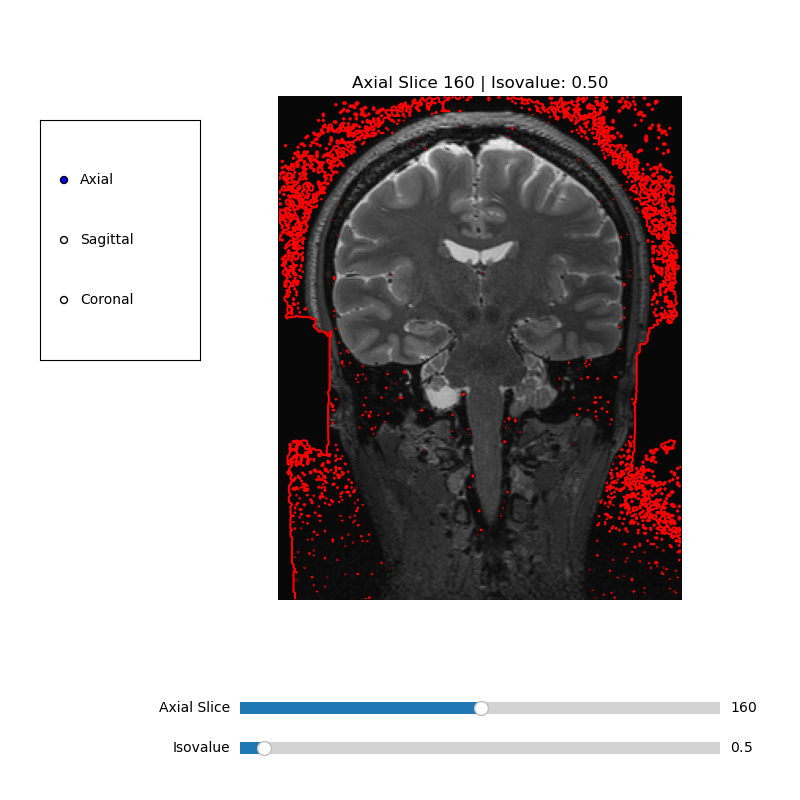

In [7]:
%pip install opencv-python
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons

def load_volume(filename: str, shape=(320, 320, 256), dtype=np.float32):
    with open(filename, 'rb') as f:
        volume = np.fromfile(f, dtype=dtype).reshape(shape)
    return volume

def get_slice(volume: np.ndarray, axis: int, index: int):
    if axis == 0:
        return volume[index, :, :]
    elif axis == 1:
        return volume[:, index, :]
    elif axis == 2:
        return volume[:, :, index]
    else:
        raise ValueError("Axis must be 0, 1, or 2.")

filename = "T2.raw"
shape = (320, 320, 256)
volume = load_volume(filename, shape)

axis = 0
slice_index = shape[axis] // 2
isovalue = 0.5

fig, ax = plt.subplots(figsize=(8, 8))
plt.subplots_adjust(left=0.3, bottom=0.25)

img = get_slice(volume, axis, slice_index)
image_display = ax.imshow(img, cmap="gray")
contour_display = [ax.contour(img, levels=[isovalue], colors='red')]
ax.set_title(f"{['Axial','Sagittal','Coronal'][axis]} Slice {slice_index} | Isovalue: {isovalue:.2f}")
ax.axis("off")

radio_ax = plt.axes([0.05, 0.55, 0.2, 0.3])
radio = RadioButtons(radio_ax, ('Axial', 'Sagittal', 'Coronal'))

slice_slider_ax = plt.axes([0.3, 0.1, 0.6, 0.03])
slice_slider = Slider(slice_slider_ax, f'{["Axial", "Sagittal", "Coronal"][axis]} Slice',
                      0, shape[axis]-1, valinit=slice_index, valstep=1)

iso_slider_ax = plt.axes([0.3, 0.05, 0.6, 0.03])
iso_slider = Slider(iso_slider_ax, 'Isovalue', np.min(volume), np.max(volume), valinit=isovalue)

def update_plot():
    idx = int(slice_slider.val)
    iso = iso_slider.val
    new_img = get_slice(volume, axis, idx)

    ax.clear()  

    ax.imshow(new_img, cmap="gray")

    contour_display[0] = ax.contour(new_img, levels=[iso], colors='red')

    ax.set_title(f"{['Axial','Sagittal','Coronal'][axis]} Slice {idx} | Isovalue: {iso:.2f}")
    ax.axis("off")
    fig.canvas.draw_idle()

def on_slice_change(val):
    update_plot()

def on_iso_change(val):
    update_plot()

slice_slider.on_changed(on_slice_change)
iso_slider.on_changed(on_iso_change)

def on_axis_change(label):
    global axis
    axis = {'Axial': 0, 'Sagittal': 1, 'Coronal': 2}[label]
    new_max = shape[axis] - 1

    slice_slider.label.set_text(f'{label} Slice')
    slice_slider.valmax = new_max
    slice_slider.ax.set_xlim(0, new_max)

    slice_slider.set_val(min(slice_slider.val, new_max))

    update_plot()

radio.on_clicked(on_axis_change)

plt.show()


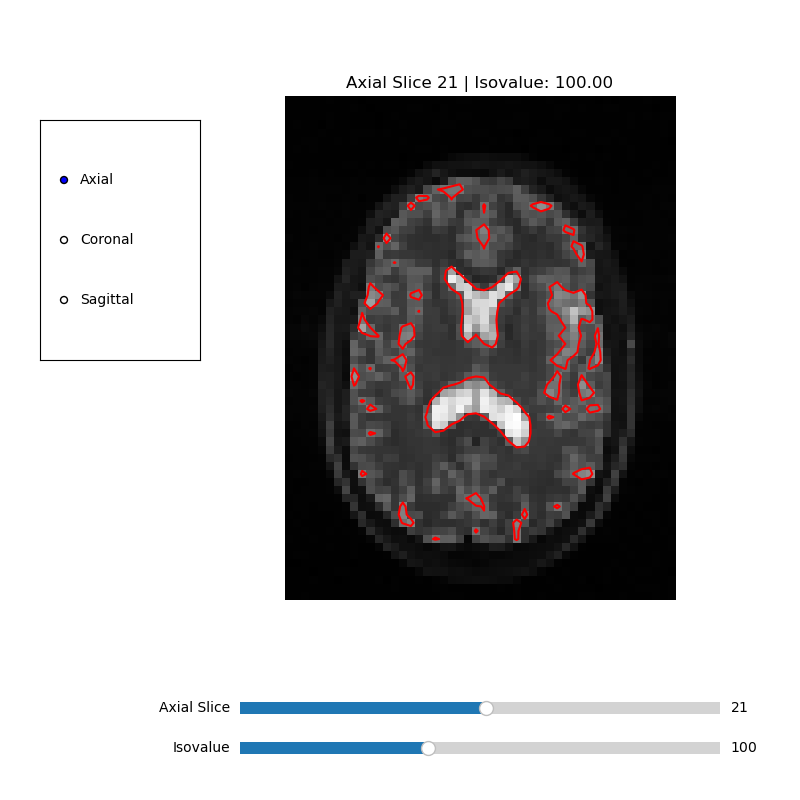

In [8]:
def load_volume2(filename2: str, shape2=(42, 62, 48), dtype=np.uint8) -> np.ndarray:
    with open(filename2, 'rb') as f:
        volume2 = np.fromfile(f, dtype=dtype).reshape(shape2)
    return volume2

def get_slice2(volume2: np.ndarray, axis2: int, index2: int) -> np.ndarray:
    if axis2 == 0:
        return volume2[index2, :, :]
    elif axis2 == 1:
        return volume2[:, index2, :]
    elif axis2 == 2:
        return volume2[:, :, index2]
    else:
        raise ValueError("Axis must be 0, 1, or 2.")

filename2 = "HeadMRVolume.raw"
shape2 = (42, 62, 48) 
volume2 = load_volume2(filename2, shape2)

axis2 = 0
slice_index2 = shape2[axis2] // 2
isovalue2 = 100  

fig2, ax2 = plt.subplots(figsize=(8, 8))
plt.subplots_adjust(left=0.3, bottom=0.25)

img2 = get_slice2(volume2, axis2, slice_index2)
image_display2 = ax2.imshow(img2, cmap="gray")
contour_display2 = [ax2.contour(img2, levels=[isovalue2], colors='red')]
ax2.set_title(f"{['Axial','Coronal','Sagittal'][axis2]} Slice {slice_index2} | Isovalue: {isovalue2:.2f}")
ax2.axis("off")

radio_ax2 = plt.axes([0.05, 0.55, 0.2, 0.3])
radio2 = RadioButtons(radio_ax2, ('Axial', 'Coronal', 'Sagittal'))

slice_slider_ax2 = plt.axes([0.3, 0.1, 0.6, 0.03])
slice_slider2 = Slider(slice_slider_ax2, f'{["Axial", "Coronal", "Sagittal"][axis2]} Slice',
                       0, shape2[axis2]-1, valinit=slice_index2, valstep=1)

iso_slider_ax2 = plt.axes([0.3, 0.05, 0.6, 0.03])
iso_slider2 = Slider(iso_slider_ax2, 'Isovalue', np.min(volume2), np.max(volume2), valinit=isovalue2)

def update_plot2():
    idx2 = int(slice_slider2.val)
    iso2 = iso_slider2.val
    new_img2 = get_slice2(volume2, axis2, idx2)

    ax2.clear()

    image_display2 = ax2.imshow(new_img2, cmap="gray")
    contour_display2[0] = ax2.contour(new_img2, levels=[iso2], colors='red')

    ax2.set_title(f"{['Axial','Coronal','Sagittal'][axis2]} Slice {idx2} | Isovalue: {iso2:.2f}")
    ax2.axis("off")
    fig2.canvas.draw_idle()

def on_slice_change2(val):
    update_plot2()

def on_iso_change2(val):
    update_plot2()

slice_slider2.on_changed(on_slice_change2)
iso_slider2.on_changed(on_iso_change2)

def on_axis_change2(label2):
    global axis2
    axis2 = {'Axial': 1, 'Coronal': 2, 'Sagittal': 0}[label2]
    new_max2 = shape2[axis2] - 1

    slice_slider2.label.set_text(f'{label2} Slice')
    slice_slider2.valmax = new_max2
    slice_slider2.ax.set_xlim(0, new_max2)

    slice_slider2.set_val(min(slice_slider2.val, new_max2)) 

radio2.on_clicked(on_axis_change2)

plt.show()


Note: you may need to restart the kernel to use updated packages.


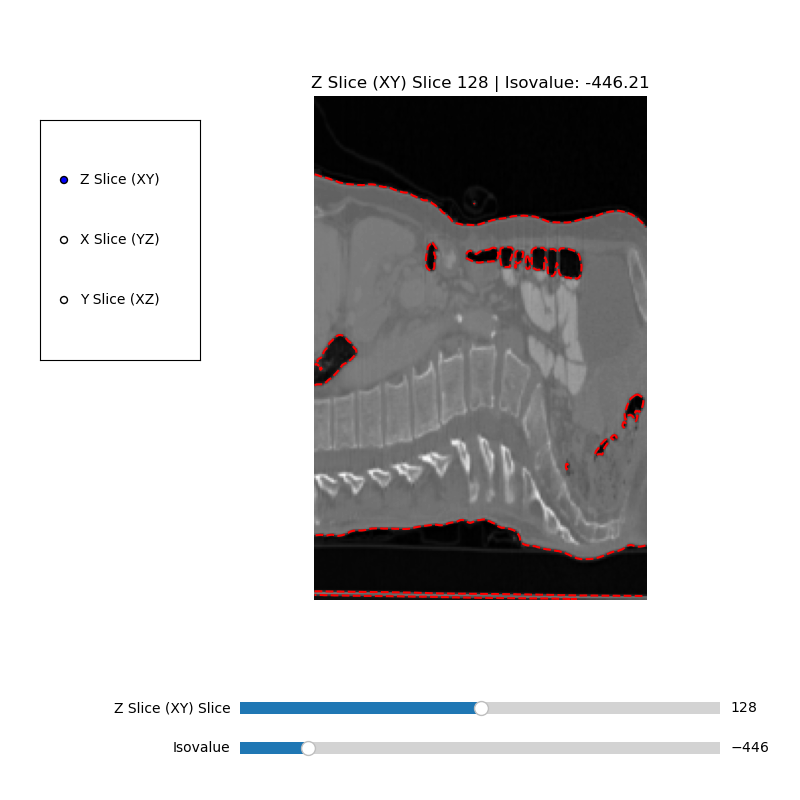

In [9]:
%pip install pyvista opencv-python
import pyvista as pv

vtk_path3 = "ctscan_ez.vtk"
vtk_grid3 = pv.read(vtk_path3)
ct_data3 = vtk_grid3.point_data[vtk_grid3.point_data.keys()[0]]  
ct_shape3 = vtk_grid3.dimensions
ct_volume3 = ct_data3.reshape(ct_shape3, order="F") 

def extract_slice3(volume_array3, axis_index3, slice_num3):
    if axis_index3 == 0:
        slice_2d_3 = volume_array3[slice_num3, :, :]
    elif axis_index3 == 1:
        slice_2d_3 = volume_array3[:, slice_num3, :]
    elif axis_index3 == 2:
        slice_2d_3 = volume_array3[:, :, slice_num3]
    else:
        raise ValueError("Axis must be 0, 1, or 2.")
    return slice_2d_3

display_axis3 = 0
slice_idx3 = ct_volume3.shape[display_axis3] // 2
isovalue3 = np.mean(ct_volume3)

fig3, ax3 = plt.subplots(figsize=(8, 8))
plt.subplots_adjust(left=0.3, bottom=0.25)

img3 = extract_slice3(ct_volume3, display_axis3, slice_idx3)
img_display3 = ax3.imshow(img3, cmap='gray')
contour_display3 = [ax3.contour(img3, levels=[isovalue3], colors='red')]

ax3.set_title(f"{['Z Slice (XY)','X Slice (YZ)','Y Slice (XZ)'][display_axis3]} Slice {slice_idx3} | Isovalue: {isovalue3:.2f}")
ax3.axis("off")

radio_ax3 = plt.axes([0.05, 0.55, 0.2, 0.3])
radio3 = RadioButtons(radio_ax3, ('Z Slice (XY)', 'X Slice (YZ)', 'Y Slice (XZ)'))

slice_slider_ax3 = plt.axes([0.3, 0.1, 0.6, 0.03])
slice_slider3 = Slider(slice_slider_ax3, f'{["Z Slice (XY)", "X Slice (YZ)", "Y Slice (XZ)"][display_axis3]} Slice',
                       0, ct_volume3.shape[display_axis3]-1, valinit=slice_idx3, valstep=1)

iso_slider_ax3 = plt.axes([0.3, 0.05, 0.6, 0.03])
iso_slider3 = Slider(iso_slider_ax3, 'Isovalue', np.min(ct_volume3), np.max(ct_volume3), valinit=isovalue3)

def update_plot3():
    idx3 = int(slice_slider3.val)
    iso3 = iso_slider3.val
    new_img3 = extract_slice3(ct_volume3, display_axis3, idx3)

    ax3.clear()
    img_display3 = ax3.imshow(new_img3, cmap='gray')
    contour_display3[0] = ax3.contour(new_img3, levels=[iso3], colors='red')
    ax3.set_title(f"{['Z Slice (XY)', 'X Slice (YZ)', 'Y Slice (XZ)'][display_axis3]} Slice {idx3} | Isovalue: {iso3:.2f}")
    ax3.axis("off")
    fig3.canvas.draw_idle()

def on_slice_change3(val):
    update_plot3()

def on_iso_change3(val):
    update_plot3()

def on_axis_change3(label3):
    global display_axis3
    display_axis3 = {'Z Slice (XY)': 0, 'X Slice (YZ)': 1, 'Y Slice (XZ)': 2}[label3]
    new_max3 = ct_volume3.shape[display_axis3] - 1

    slice_slider3.label.set_text(f'{label3} Slice')
    slice_slider3.valmax = new_max3
    slice_slider3.ax.set_xlim(0, new_max3)
    slice_slider3.set_val(min(slice_slider3.val, new_max3))

slice_slider3.on_changed(on_slice_change3)
iso_slider3.on_changed(on_iso_change3)
radio3.on_clicked(on_axis_change3)

plt.show()